# RandomForestRegressor performed better

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,VarianceThreshold,SelectFromModel
import scipy.stats as st
import pylab

In [2]:
train=pd.read_csv('../dataset/marts/Train.csv')
test=pd.read_csv('../dataset/marts/Test.csv')

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [7]:
train.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# EDA


# Handling Missing Values

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [12]:
train['Outlet_Identifier'][train['Outlet_Size'].isnull()].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [13]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [15]:
test['Outlet_Size'].mode()

0    Medium
dtype: object

In [16]:
train['Outlet_Size'].fillna('Medium',inplace=True)
test['Outlet_Size'].fillna('Medium',inplace=True)

In [17]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
train['Outlet_Establishment_Year']=train['Outlet_Establishment_Year'].apply(lambda x:2020-x)
test['Outlet_Establishment_Year']=test['Outlet_Establishment_Year'].apply(lambda x:2020-x)

In [21]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility']=test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

# Visualization

# Univariate Analysis

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

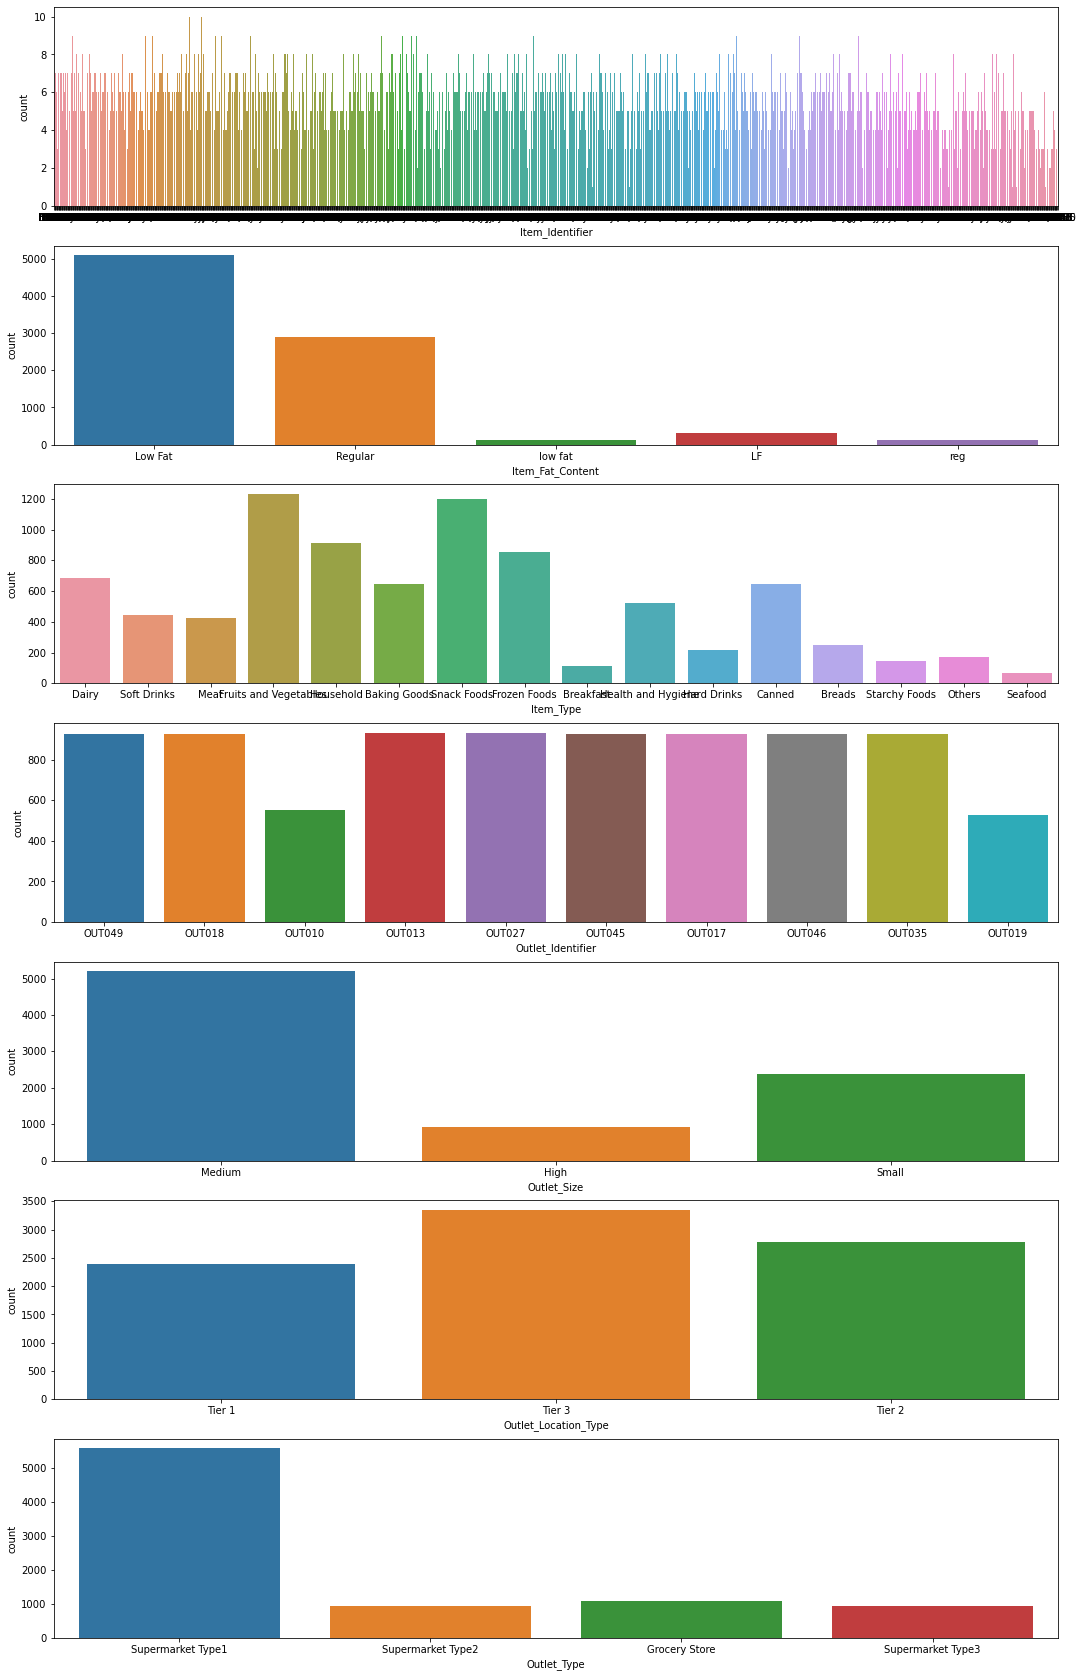

In [23]:
cat=train.select_dtypes(include='object')
fig,ax=plt.subplots(7,figsize=(18,30))
index=0
col=cat.columns
for i in range(7):
    sns.countplot(x=col[index],data=train,ax=ax[i])
    index=index+1

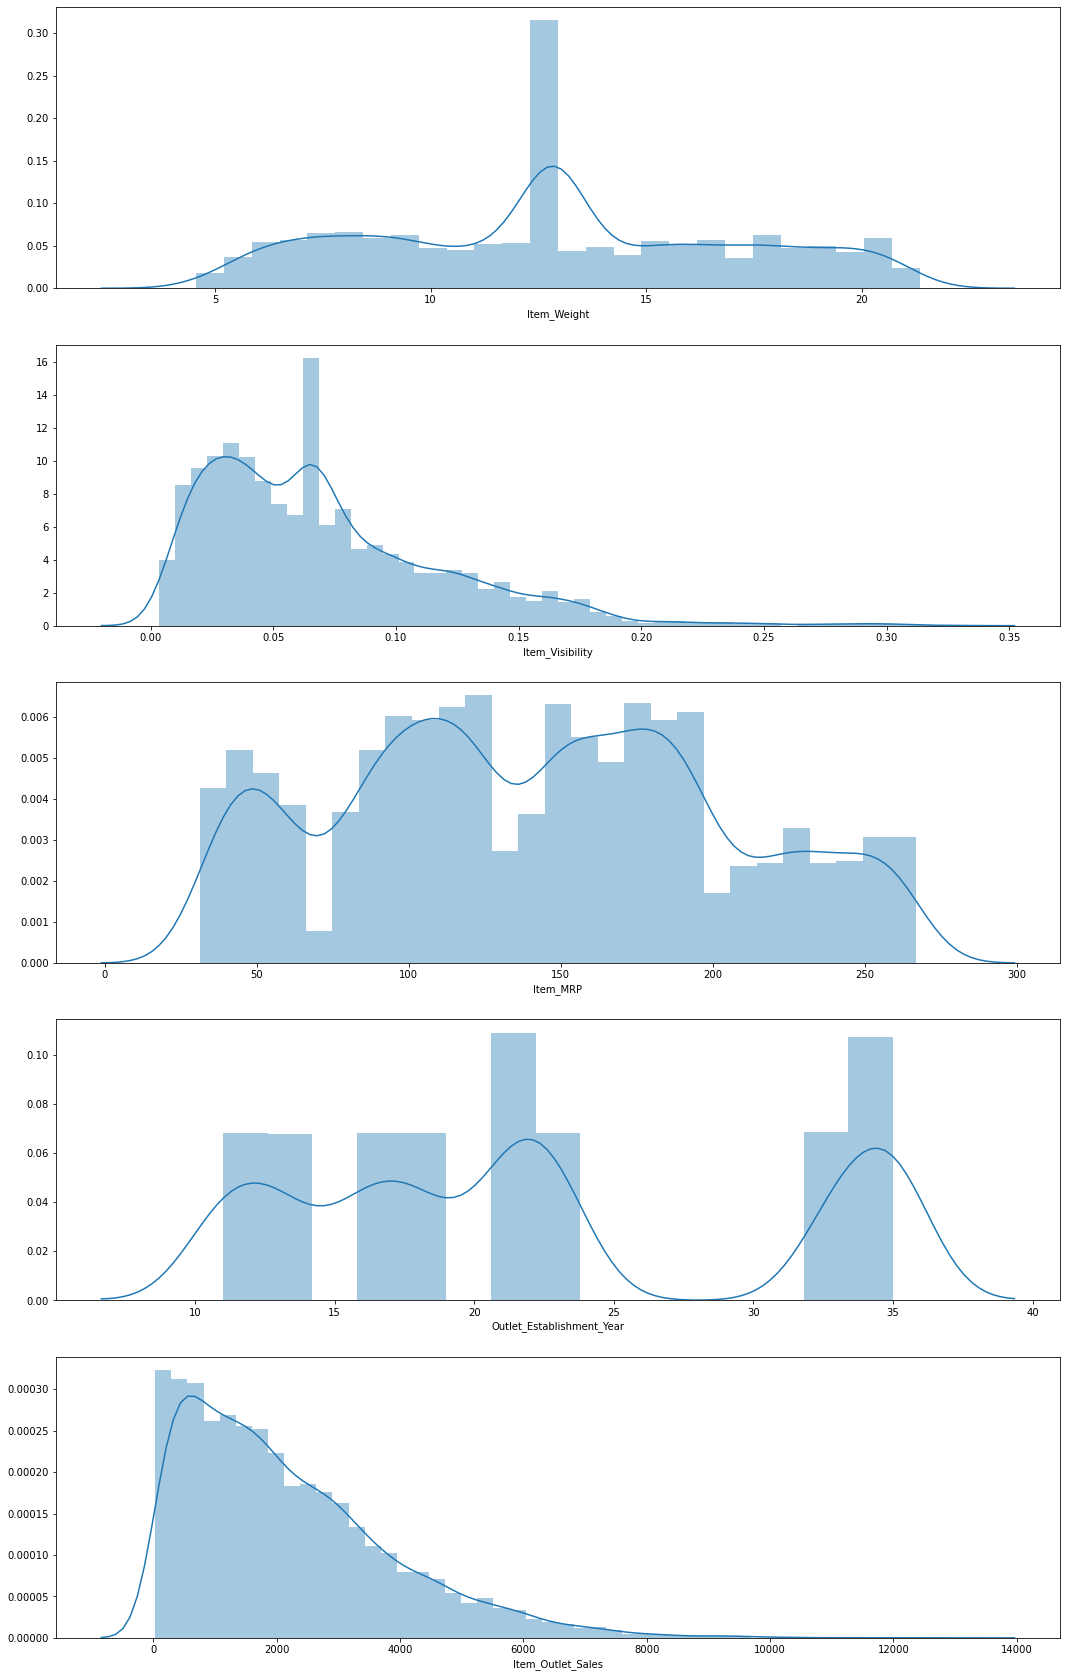

In [24]:
num=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(len(num.columns),figsize=(18,30))
index=0
col=num.columns
for i in range(len(num.columns)):
    sns.distplot(train[col[index]],ax=ax[i])
    index=index+1

# Bivariate Analysis

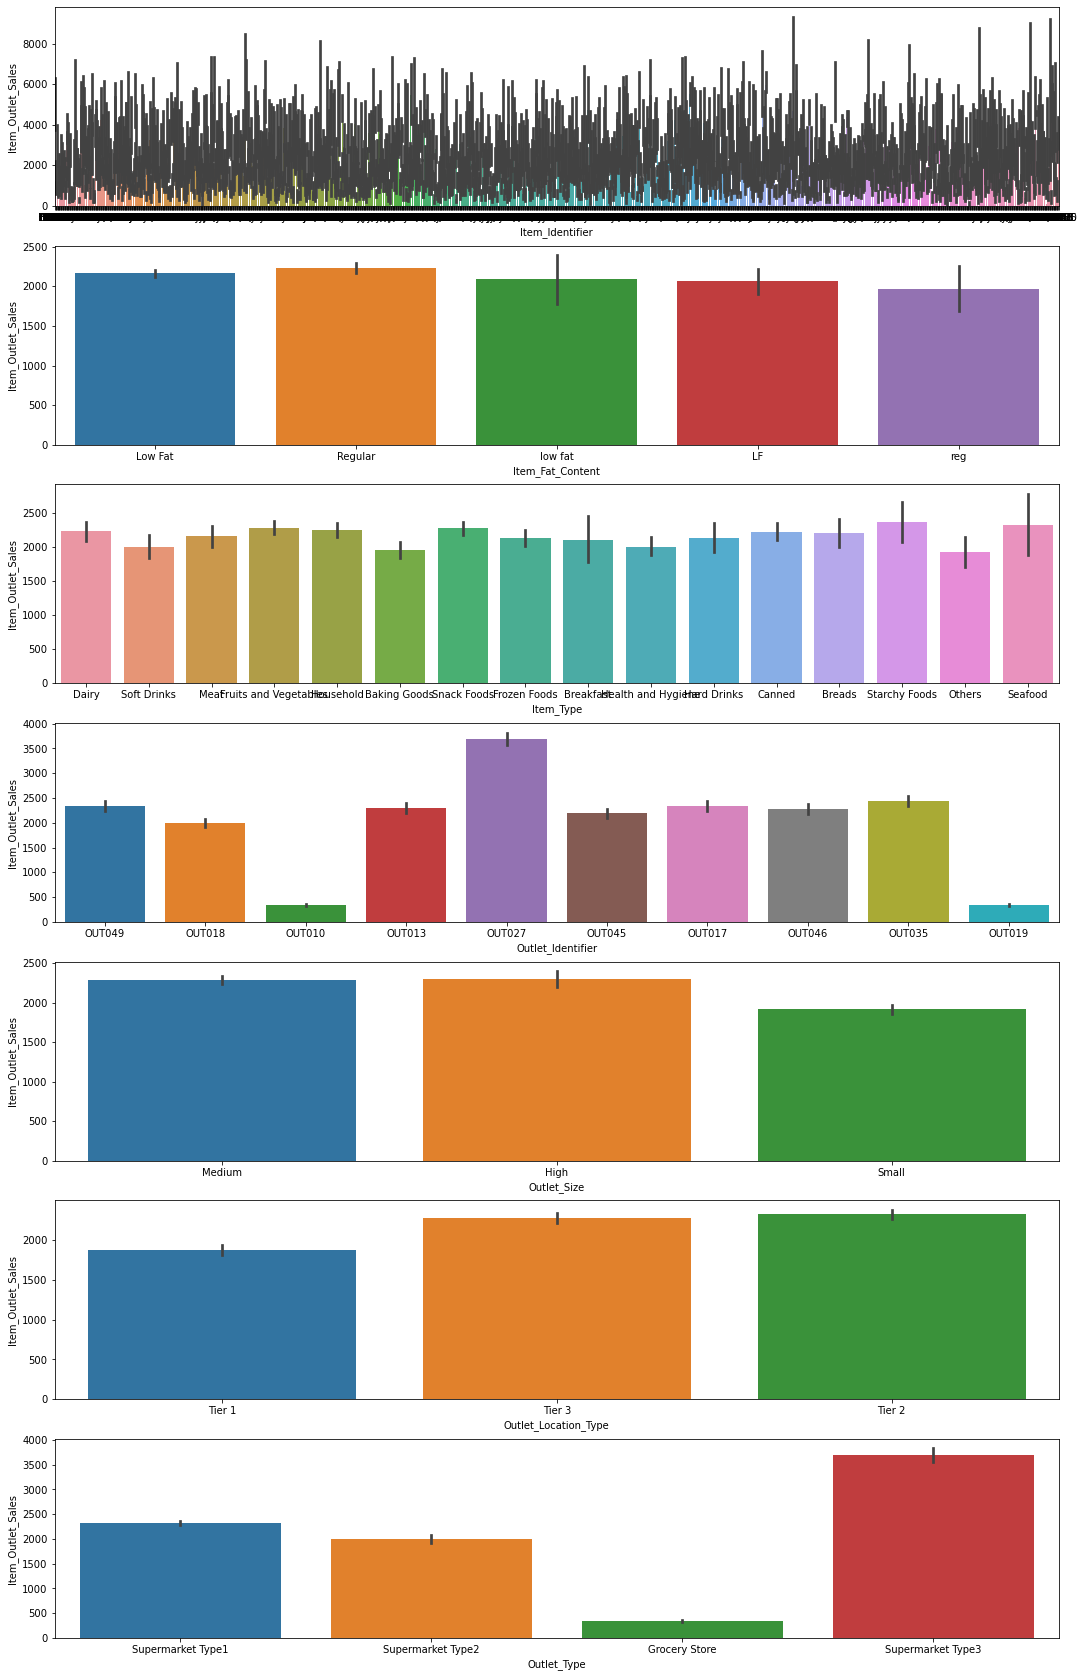

In [25]:
cat=train.select_dtypes(include='object')
fig,ax=plt.subplots(7,figsize=(18,30))
index=0
col=cat.columns
for i in range(7):
    sns.barplot(x=col[index],y='Item_Outlet_Sales',data=train,ax=ax[i])
    index=index+1

In [26]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.008301,0.078355,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,0.049135,1.000000


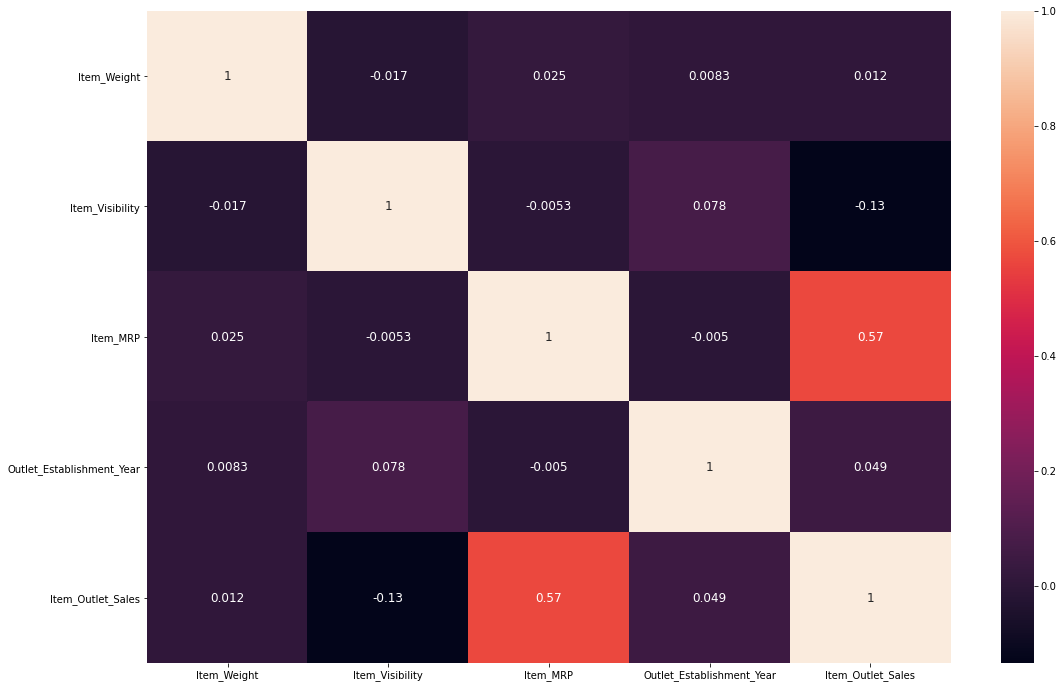

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(),annot=True,annot_kws={'size':12})

# Feature Engineering

In [28]:
le=LabelEncoder()


In [29]:
for i in cat.columns:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

In [30]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,21,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,11,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,21,1,0,1,2097.2700
3,1121,19.200,2,0.066132,6,182.0950,0,22,1,2,0,732.3800
4,1297,8.930,1,0.066132,9,53.8614,1,33,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,33,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,18,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,16,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,11,1,2,2,1845.5976


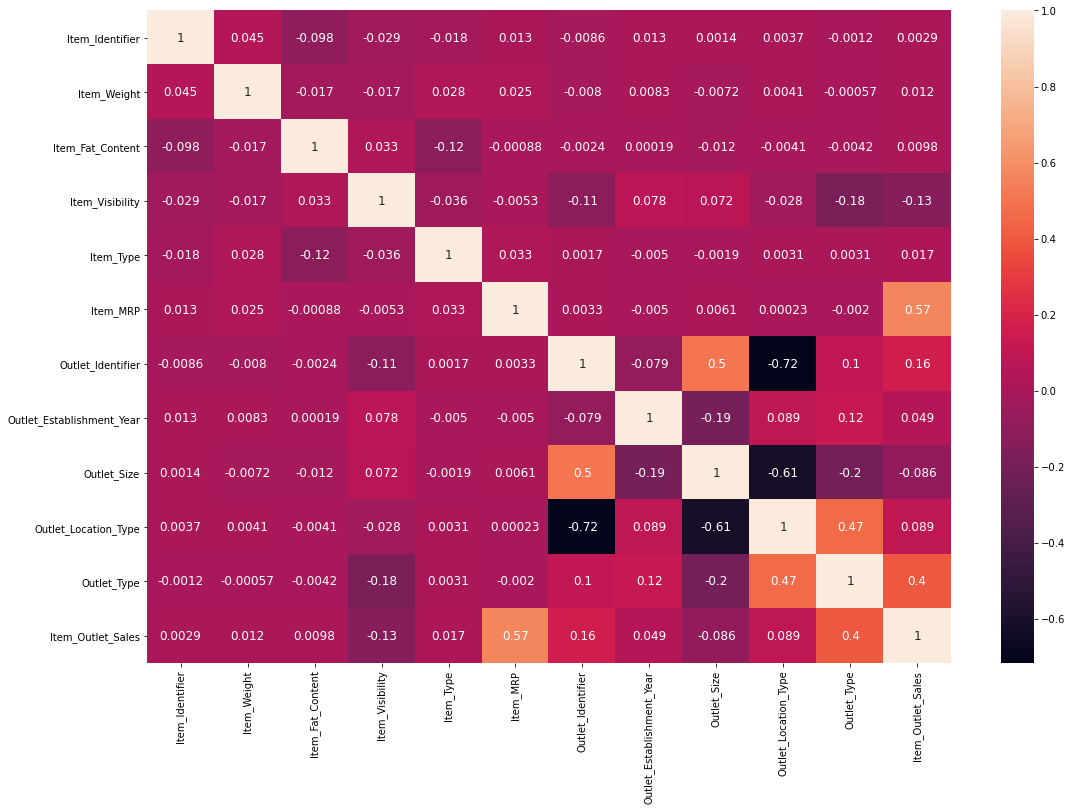

In [31]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(),annot=True,annot_kws={'size':12})


# Splitting data into train and test

In [32]:
x=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling Features

In [34]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [35]:
x_train1=sc.transform(x_train)
x_test1=sc.transform(x_test)

# LinearRegression

In [36]:
def model(x_train,x_test,y_train,y_test):
    clf=LinearRegression()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    print('r2:',r2_score(y_test,pred))
    print('mse',mean_squared_error(y_test,pred))
    print('mae:',mean_absolute_error(y_test,pred))
    


In [37]:
model(x_train,x_test,y_train,y_test)

r2: 0.5132036344057787
mse 1424784.5442494892
mae: 910.0571386021654


In [38]:
model(x_train1,x_test1,y_train,y_test)

r2: 0.5132036344057789
mse 1424784.5442494887
mae: 910.0571386021646


# RandomForestRegressor

In [39]:
def rmodel(x_train,x_test,y_train,y_test):
    clf=RandomForestRegressor()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    print('r2:',r2_score(y_test,pred))
    print('mse',mean_squared_error(y_test,pred))
    print('mae:',mean_absolute_error(y_test,pred))

In [40]:
rmodel(x_train,x_test,y_train,y_test)

r2: 0.5446427723107798
mse 1332766.6062829746
mae: 823.7118237548386


In [41]:
rmodel(x_train1,x_test1,y_train,y_test)

r2: 0.5363555901398391
mse 1357022.0237574317
mae: 828.408345714956


In [42]:
 r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(df,threshold):
    feat=[]
    values=[]
    data=df.corr()['Item_Outlet_Sales']
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Item_Outlet_Sales',axis=1)
    y=df2['Item_Outlet_Sales']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
   

In [43]:
model(train,0.0).T
model(train,0.01).T
model(train,0.02).T
model(train,0.03).T
model(train,0.05).T
model(train,0.1).T


,name,features,r2,mae,mse
0,"Index(['Item_Identifier', 'Item_Weight', 'Item...",11,0.508234,893.846,1.46846e+06
1,"Index(['Item_Weight', 'Item_Visibility', 'Item...",9,0.512983,906.34,1.4198e+06
2,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.517972,897.107,1.41217e+06
3,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.520797,910.571,1.41329e+06
4,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",6,0.489033,886.743,1.40229e+06
5,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",4,0.518907,864.972,1.34574e+06


In [44]:
 r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(df,threshold):
    feat=[]
    values=[]
    data=df.corr()['Item_Outlet_Sales']
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Item_Outlet_Sales',axis=1)
    y=df2['Item_Outlet_Sales']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=RandomForestRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
   

In [45]:
model(train,0.0).T
model(train,0.01).T
model(train,0.02).T
model(train,0.03).T
model(train,0.05).T
model(train,0.1).T


,name,features,r2,mae,mse
0,"Index(['Item_Identifier', 'Item_Weight', 'Item...",11,0.528161,826.003,1.41177e+06
1,"Index(['Item_Weight', 'Item_Visibility', 'Item...",9,0.567605,758.611,1.21161e+06
2,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.58152,788.089,1.2342e+06
3,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.540558,835.988,1.41833e+06
4,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",6,0.52014,815.643,1.40679e+06
5,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",4,0.586118,775.932,1.20801e+06


# Cross validation

In [46]:
scores=cross_val_score(LinearRegression(),x_train1,y_train,cv=5,scoring='r2')

In [47]:
scores.mean()

0.5073354984018767

In [48]:
scores=cross_val_score(RandomForestRegressor(),x_train1,y_train,cv=10,scoring='r2')

In [49]:
scores.mean()

0.5546694248041932

In [52]:
 r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(df,threshold):
    feat=[]
    values=[]
    data=df.corr()['Item_Outlet_Sales']
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Item_Outlet_Sales',axis=1)
    y=df2['Item_Outlet_Sales']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=GradientBoostingRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
   

In [53]:
model(train,0.0).T
model(train,0.01).T
model(train,0.02).T
model(train,0.03).T
model(train,0.05).T
model(train,0.1).T


,name,features,r2,mae,mse
0,"Index(['Item_Identifier', 'Item_Weight', 'Item...",11,0.579427,783.793,1.30094e+06
1,"Index(['Item_Weight', 'Item_Visibility', 'Item...",9,0.588707,764.988,1.20996e+06
2,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.588284,773.905,1.21159e+06
3,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",7,0.579023,777.613,1.16637e+06
4,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",6,0.576038,775.303,1.18851e+06
5,"Index(['Item_Visibility', 'Item_MRP', 'Outlet_...",4,0.575043,797.249,1.28391e+06
